In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities

cities = []

# Identify the nearest city for each latitude and longitude combinaiton

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
# If the city is unique, then we will add it to the cities list

    if city not in cities:
        cities.append(city)
        
# Print th ecity count to confirm sufficient count

len(cities)

650

In [6]:
# Import the requests library

import requests

# Import the API key

from config import weather_api

In [7]:
# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5195088b8504bbd0796aa4f556759d7d"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5195088b8504bbd0796aa4f556759d7d


In [8]:
# Import the datetime module from the datetime library

from datetime import datetime

In [9]:
# Create an empty list to hold the weather data

city_data =[]

# Print the beginning of the logging

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list

for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city (for i, item in enumerate(list):)

    city_url = url + "&q=" + "i"

# Loop through all the cities in the list
    
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city

    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city

    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count

    record_count += 1
    
    # Run an API request for each of the cities
    
    try:
        
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | saint-philippe
Processing Record 2 of Set 13 | wajima
Processing Record 3 of Set 13 | kaitangata
Processing Record 4 of Set 13 | nebolchi
Processing Record 5 of Set 13 | ushuaia
Processing Record 6 of Set 13 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 7 of Set 13 | srandakan
Processing Record 8 of Set 13 | hilo
Processing Record 9 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 13 | waipawa
Processing Record 11 of Set 13 | acapulco
Processing Record 12 of Set 13 | samusu
City not found. Skipping...
Processing Record 13 of Set 13 | nagato
Processing Record 14 of Set 13 | tuatapere
Processing Record 15 of Set 13 | bredasdorp
Processing Record 16 of Set 13 | vestmannaeyjar
Processing Record 17 of Set 13 | tabou
Processing Record 18 of Set 13 | punta arenas
Processing Record 19 of Set 13 | sitka
Processing Record 20 of Set 13 | mataura
Processi

Processing Record 35 of Set 16 | ponta delgada
Processing Record 36 of Set 16 | smithers
Processing Record 37 of Set 16 | lodeynoye pole
Processing Record 38 of Set 16 | luau
Processing Record 39 of Set 16 | amderma
City not found. Skipping...
Processing Record 40 of Set 16 | aksu
Processing Record 41 of Set 16 | praia da vitoria
Processing Record 42 of Set 16 | port augusta
Processing Record 43 of Set 16 | kodiak
Processing Record 44 of Set 16 | ouallam
Processing Record 45 of Set 16 | arica
Processing Record 46 of Set 16 | amboasary
Processing Record 47 of Set 16 | baglan
Processing Record 48 of Set 16 | mana
Processing Record 49 of Set 16 | fairbanks
Processing Record 50 of Set 16 | lebu
Processing Record 1 of Set 17 | komsomolskiy
Processing Record 2 of Set 17 | halalo
City not found. Skipping...
Processing Record 3 of Set 17 | los llanos de aridane
Processing Record 4 of Set 17 | pacific grove
Processing Record 5 of Set 17 | san jose
Processing Record 6 of Set 17 | silver city
Pro

Processing Record 22 of Set 20 | oktyabrskiy
Processing Record 23 of Set 20 | husainabad
Processing Record 24 of Set 20 | ponta do sol
Processing Record 25 of Set 20 | beringovskiy
Processing Record 26 of Set 20 | barra patuca
Processing Record 27 of Set 20 | yakeshi
Processing Record 28 of Set 20 | lambarene
Processing Record 29 of Set 20 | pacifica
Processing Record 30 of Set 20 | sobolevo
Processing Record 31 of Set 20 | santa teresa
Processing Record 32 of Set 20 | progreso
Processing Record 33 of Set 20 | tonj
Processing Record 34 of Set 20 | beloha
Processing Record 35 of Set 20 | idah
Processing Record 36 of Set 20 | zholymbet
Processing Record 37 of Set 20 | saldanha
Processing Record 38 of Set 20 | denpasar
Processing Record 39 of Set 20 | yuzhno-kurilsk
Processing Record 40 of Set 20 | kirakira
Processing Record 41 of Set 20 | tsiroanomandidy
Processing Record 42 of Set 20 | alto baudo
City not found. Skipping...
Processing Record 43 of Set 20 | jardim
Processing Record 44 of

Processing Record 9 of Set 24 | viana
Processing Record 10 of Set 24 | ambilobe
Processing Record 11 of Set 24 | ulefoss
Processing Record 12 of Set 24 | riobamba
Processing Record 13 of Set 24 | kristiansand
Processing Record 14 of Set 24 | redlands
Processing Record 15 of Set 24 | passos
Processing Record 16 of Set 24 | los algarrobos
Processing Record 17 of Set 24 | dwarka
Processing Record 18 of Set 24 | byron bay
Processing Record 19 of Set 24 | nautla
Processing Record 20 of Set 24 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 21 of Set 24 | meyungs
City not found. Skipping...
Processing Record 22 of Set 24 | olafsvik
Processing Record 23 of Set 24 | sisimiut
Processing Record 24 of Set 24 | sovetskaya
Processing Record 25 of Set 24 | falkenberg
Processing Record 26 of Set 24 | galesong
Processing Record 27 of Set 24 | ruston
Processing Record 28 of Set 24 | lompoc
Processing Record 29 of Set 24 | vostok
Processing Record 30 of Set 24 | srednekolymsk
Processi

In [10]:
len(city_data)

602

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.36,55.77,69.80,77,20,8.05,RE,2020-05-09 20:49:59
1,Wajima,37.40,136.90,58.35,91,100,13.13,JP,2020-05-09 20:49:59
2,Kaitangata,-46.28,169.85,50.00,74,95,1.99,NZ,2020-05-09 20:49:59
3,Nebolchi,59.12,33.35,38.79,74,29,2.73,RU,2020-05-09 20:50:00
4,Ushuaia,-54.80,-68.30,48.20,70,75,4.70,AR,2020-05-09 20:50:00
5,Srandakan,-7.94,110.25,77.52,85,100,4.21,ID,2020-05-09 20:50:00
6,Hilo,19.73,-155.09,78.80,65,40,6.93,US,2020-05-09 20:50:00
7,Waipawa,-41.41,175.52,55.40,87,0,13.87,NZ,2020-05-09 20:50:00
8,Acapulco,16.86,-99.89,87.80,62,5,8.05,MX,2020-05-09 20:50:00
9,Nagato,34.38,131.20,66.20,100,75,6.93,JP,2020-05-09 20:50:01


In [12]:
# Re-arrange columns, put back into dataframe

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2020-05-09 20:49:59,-21.36,55.77,69.80,77,20,8.05
1,Wajima,JP,2020-05-09 20:49:59,37.40,136.90,58.35,91,100,13.13
2,Kaitangata,NZ,2020-05-09 20:49:59,-46.28,169.85,50.00,74,95,1.99
3,Nebolchi,RU,2020-05-09 20:50:00,59.12,33.35,38.79,74,29,2.73
4,Ushuaia,AR,2020-05-09 20:50:00,-54.80,-68.30,48.20,70,75,4.70
...,...,...,...,...,...,...,...,...,...
597,Alta Floresta,BR,2020-05-09 20:51:04,-9.88,-56.09,89.60,55,40,5.82
598,Minamata,JP,2020-05-09 20:51:48,32.22,130.40,69.93,93,100,6.80
599,Hualahuises,MX,2020-05-09 20:51:48,24.88,-99.67,73.67,68,89,9.71
600,Sandwick,GB,2020-05-09 20:51:49,60.00,-1.25,35.60,72,66,18.34


In [14]:
# Create the output file(CSV)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

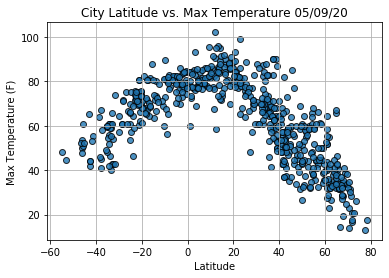

In [16]:
# Build the scatter plot for latitude vs. max temperature

import matplotlib.pyplot as plt
import time

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show plot

plt.show()

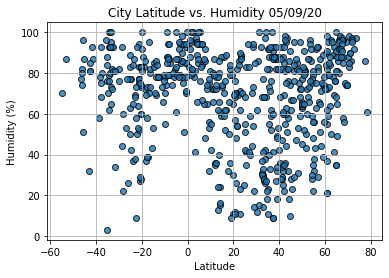

In [17]:
# Build the scatter plot for latitude vs. humidity

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show plot

plt.show()

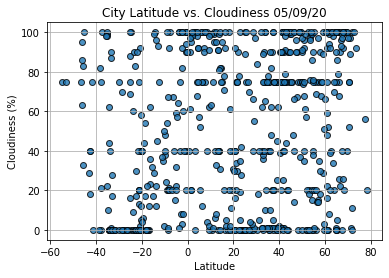

In [18]:
# Build the scatter plot for latitude vs. cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show plot

plt.show()

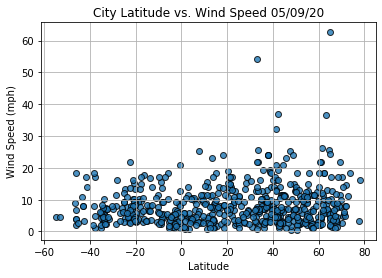

In [19]:
# Build the scatter plot for latitude vs. wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show plot

plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x = " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Add title
    plt.title(title)
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    

In [21]:
index13 = city_data_df.loc[13]
index13

City                        Tabou
Country                        CI
Date          2020-05-09 20:50:01
Lat                          4.42
Lng                         -7.35
Max Temp                    80.92
Humidity                       85
Cloudiness                     92
Wind Speed                   10.6
Name: 13, dtype: object

In [22]:
# Locate all Northern Hemisphere latitudes

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Wajima,JP,2020-05-09 20:49:59,37.40,136.90,58.35,91,100,13.13
3,Nebolchi,RU,2020-05-09 20:50:00,59.12,33.35,38.79,74,29,2.73
6,Hilo,US,2020-05-09 20:50:00,19.73,-155.09,78.80,65,40,6.93
8,Acapulco,MX,2020-05-09 20:50:00,16.86,-99.89,87.80,62,5,8.05
9,Nagato,JP,2020-05-09 20:50:01,34.38,131.20,66.20,100,75,6.93


In [23]:
# Create DataFrames for all Northern and Southern Hemisphere latitudes

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [24]:
from scipy.stats import linregress

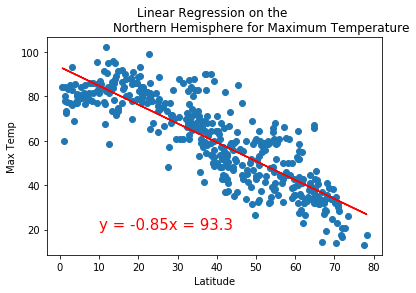

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the \n \
                       Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,20))

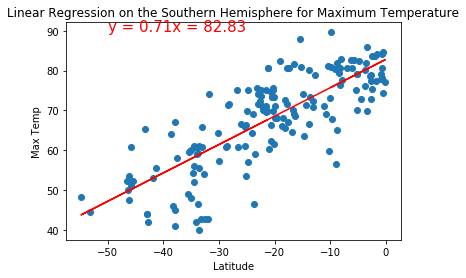

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

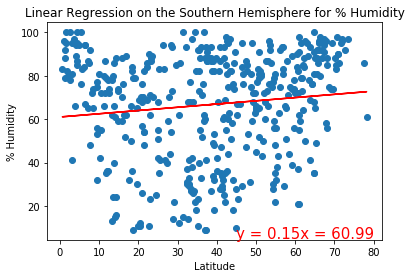

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for % Humidity",
                       '% Humidity',(45,5))

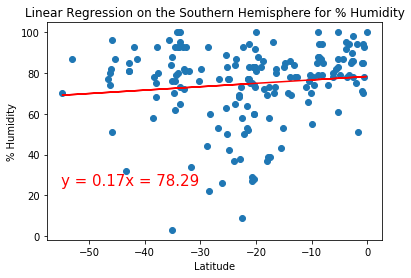

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,25))

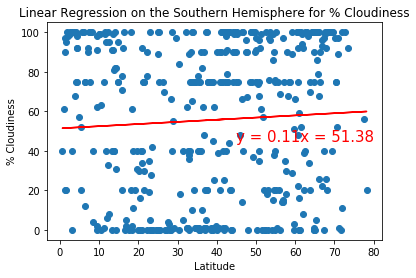

In [29]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(45,45))

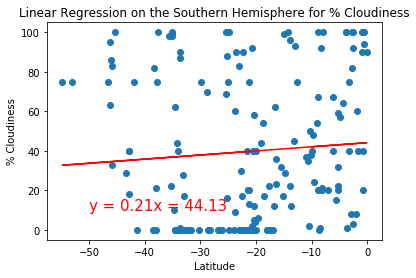

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,10))

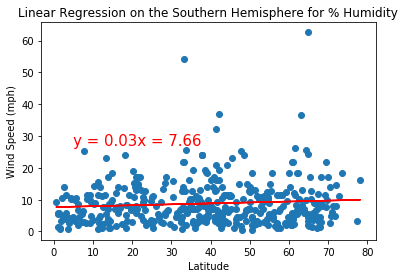

In [31]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 'Wind Speed (mph)',(5,27))

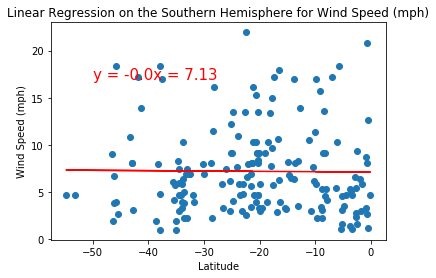

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed (mph)', 'Wind Speed (mph)',(-50,17))